In [2]:
from kwantrl.simulations.pixel_array import pixelarrayQPC
from kwantrl.optimization.trajectory_optimization import trajectory_func_to_optimize
from kwantrl.optimization.cma import optimize_cma
from kwantrl.lossfunctions.staircasiness import staircasiness
from kwantrl.datahandling.datahandling import datahandler
import numpy as np
from functools import partial
from multiprocessing import cpu_count

In [3]:
start=-3
stop=2
steps=200

# Parameters for QPC
disorder=0
outer_gates=-3
B_field=0
energy=1

# Initialize loss function
stairs=staircasiness(delta=0.05,last_step=20)

# Set common voltage sweep
common_voltages=np.linspace(start,stop,steps)


# Initialize QPC instance and set parameters
QPC=pixelarrayQPC(plot=False)

QPC.U0=disorder
QPC.energy=energy
QPC.V1=outer_gates
QPC.V11=outer_gates
QPC.phi=B_field

dat=datahandler()
# QPC.plot_disorder()

In [3]:
# import matplotlib.pyplot as plt
# QPC.energy=2
# with plt.style.context('classic'):
#     fig,ax=plt.subplots()
#     for test in np.arange(-10,-3,2):
#         QPC.V1=test
#         QPC.V11=test
#         run=QPC.parallel_transmission(common_voltages)
#         ax.plot(run,label=f'{test:.1f}')
#     ax.legend(loc='upper left')

In [4]:
order=2
start_point=np.zeros(shape=(order,8)).ravel()
kwargs={'common_mode':common_voltages,'QPC_instance':QPC,'order':order,'loss_function':stairs.window_loss,'bounds':(-3,2),'pfactor':0.001,'num_cpus':cpu_count()}
actual_func_to_minimize=partial(trajectory_func_to_optimize,**kwargs)
result,es,run_id=optimize_cma(actual_func_to_minimize,dat,start_point,maxfevals=99999,sigma=0.5,stop_time=3600,QPC=QPC)

data saved to:
/Users/qdev_26/Documents/PhD/kwantrl/kwantrl_data/outcmaes/12/
(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 16 (seed=654499, Tue Jan 18 09:57:14 2022)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     12 1.073761529476522e+00 1.0e+00 4.64e-01  5e-01  5e-01 3:46.0
    2     24 1.098317573489524e+00 1.1e+00 4.21e-01  4e-01  4e-01 7:34.2
    3     36 9.888667520862681e-01 1.1e+00 3.85e-01  4e-01  4e-01 11:22.0
    4     48 9.986604379808904e-01 1.2e+00 3.57e-01  3e-01  4e-01 15:09.3
    5     60 8.999065128386776e-01 1.2e+00 3.38e-01  3e-01  3e-01 18:56.7
    6     72 8.975256737270745e-01 1.2e+00 3.19e-01  3e-01  3e-01 22:45.5
    7     84 9.368652226196309e-01 1.3e+00 3.06e-01  3e-01  3e-01 26:33.6
    8     96 9.625437307185124e-01 1.3e+00 2.99e-01  3e-01  3e-01 30:22.3
    9    108 9.785605310096400e-01 1.3e+00 2.91e-01  3e-01  3e-01 34:01.3
   10    120 9.723755512663727e-01 1.3e+00 2.77e-01  3e-01  3e-01 37:38.8
   11    132 9.35899

plotting wavefunction at x-axis value: -1.99
plotting wavefunction at x-axis value: -1.29
plotting wavefunction at x-axis value: -0.51
plotting wavefunction at x-axis value: 0.49


[(<Figure size 640x480 with 1 Axes>,
  <AxesSubplot:title={'center':'CMA-id:12, WF at xaxis: -1.99, with conductance: 1.28'}>),
 (<Figure size 640x480 with 1 Axes>,
  <AxesSubplot:title={'center':'CMA-id:12, WF at xaxis: -1.29, with conductance: 3.01'}>),
 (<Figure size 640x480 with 1 Axes>,
  <AxesSubplot:title={'center':'CMA-id:12, WF at xaxis: -0.51, with conductance: 4.98'}>),
 (<Figure size 640x480 with 1 Axes>,
  <AxesSubplot:title={'center':'CMA-id:12, WF at xaxis: 0.49, with conductance: 6.13'}>)]

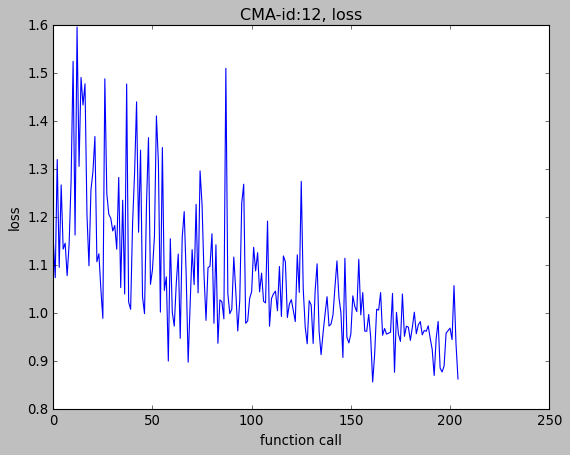

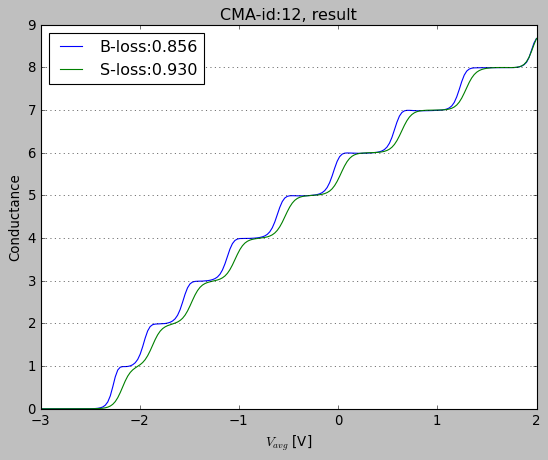

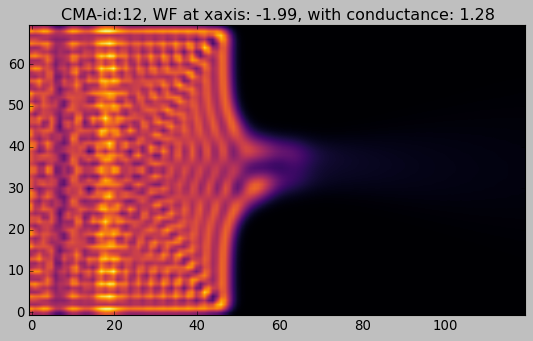

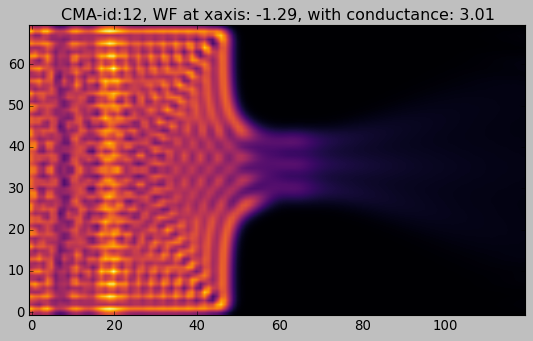

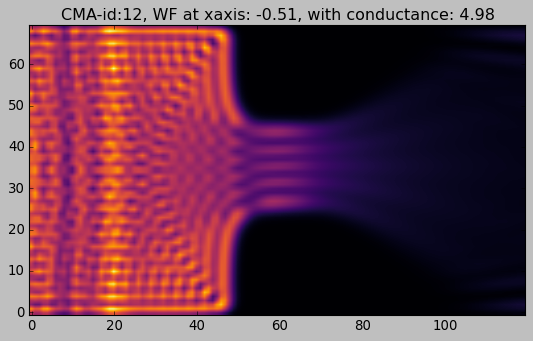

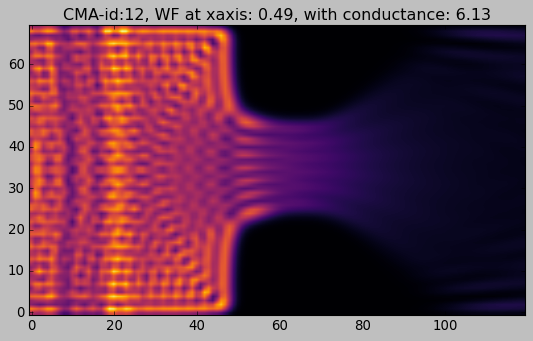

In [4]:
from kwantrl.plotting.plotting import plotter_class
import numpy as np
plotter=plotter_class(12)#run_id)
# print(np.array(plotter.data['voltages'][0]).shape)
plotter.plot_loss()
plotter.plot_result()
plotter.plot_wave_func([-2,-1.3,-0.5,0.5],QPC)
# plotter.plot_wave_func(-1.3,QPC)
# plotter.plot_wave_func(-0.5,QPC)
# plotter.plot_wave_func(0.5,QPC)